In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn

In [2]:
from keras import models
import numpy as np
import h5py
from keras.preprocessing.image import img_to_array, load_img
import os
import random
import cv2
import pandas as pd
from train import plot_history

/Users/koshkin/miniconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/koshkin/miniconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [6]:
model = models.load_model('./output-aws/tenclasses-augm/simple_cnn_multi_10c_with_aug.h5')


/Users/koshkin/miniconda3/lib/python3.6/site-packages/keras/models.py:288: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


In [8]:
model.load_weights('./output-aws/tenclasses-augm/simple_cnn_multi_10c_with_aug.h5')

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 318, 238, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 159, 119, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 157, 117, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 78, 58, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 76, 56, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 38, 28, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 36, 26, 128)       147584    
__________

In [18]:
h_df = pd.read_csv('./output-aws/fiveclasses-01/logs/history_hist_simple_cnn_multi.csv')

In [11]:
def plot_history(hist_df):

    acc = hist_df['acc']
    val_acc = hist_df['val_acc']
    loss = hist_df['loss']
    val_loss = hist_df['val_loss']

    epochs = range(1, len(acc) + 1)
    
    fig = plt.figure(figsize = (20,8))
    
    fig.add_subplot(121)

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    
    fig.add_subplot(122)

    plt.plot(epochs, loss, 'ro', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()
    return

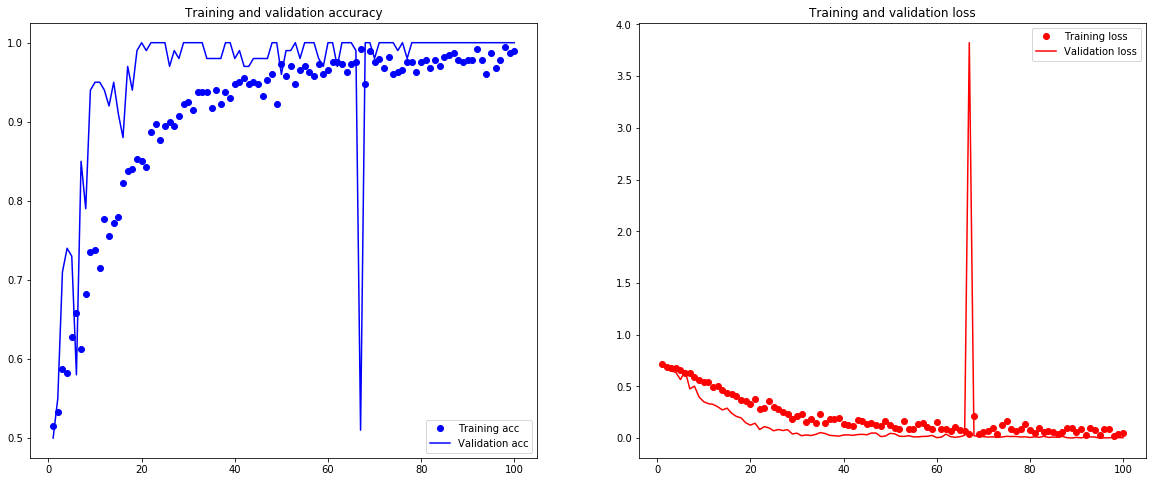

In [7]:
plot_history(h_df)

## No augmentation, 5 classes

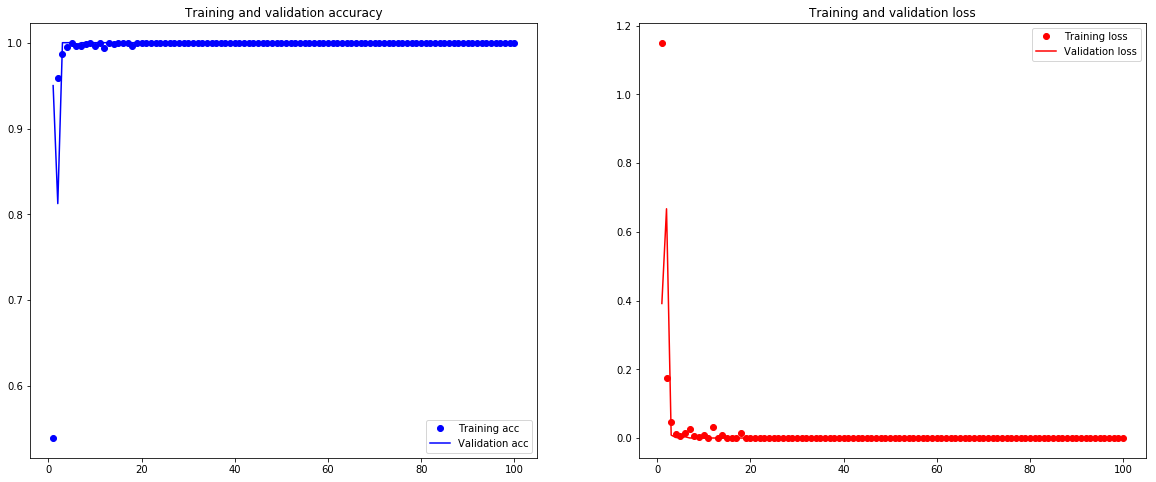

In [10]:
plot_history(h_df)

## Data Augmentation, 5 classes

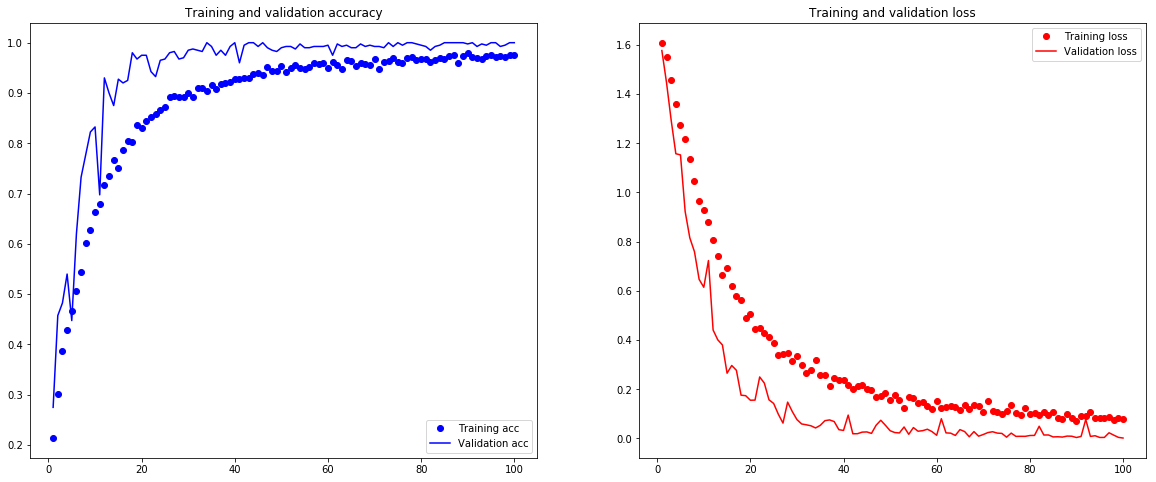

In [12]:
plot_history(pd.read_csv('./output-aws/fiveclasses-augm/logs/history_hist_simple_cnn_multi_5c_with_aug.csv'))

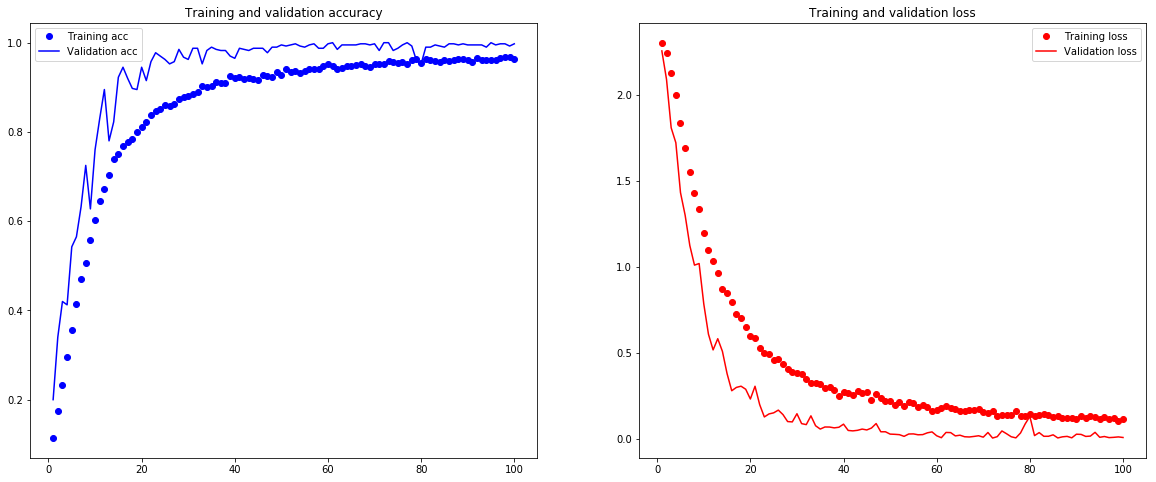

In [12]:
plot_history(pd.read_csv('./output-aws/tenclasses-augm/logs/history_hist_simple_cnn_multi_10c_with_aug.csv'))

In [9]:
model

In [18]:
train_dir = './images/human_robot_multiclass/train/'

In [13]:
from keras.preprocessing.image import ImageDataGenerator

In [27]:
train_datagen = ImageDataGenerator(
        rescale=1. / 255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

In [28]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(320, 240),
        batch_size=5,
        class_mode='categorical',
        save_to_dir='./images/keras_train'
        )

Found 800 images belonging to 2 classes.


In [29]:
train_dir = './images/human_robot_multiclass/train/'

In [35]:
train_generator.filenames

['human/human-264.jpeg',
 'human/human-334.jpeg',
 'human/human-459.jpeg',
 'human/human-29.jpeg',
 'human/human-487.jpeg',
 'human/human-352.jpeg',
 'human/human-163.jpeg',
 'human/human-220.jpeg',
 'human/human-358.jpeg',
 'human/human-21.jpeg',
 'human/human-284.jpeg',
 'human/human-136.jpeg',
 'human/human-17.jpeg',
 'human/human-350.jpeg',
 'human/human-83.jpeg',
 'human/human-223.jpeg',
 'human/human-62.jpeg',
 'human/human-233.jpeg',
 'human/human-157.jpeg',
 'human/human-67.jpeg',
 'human/human-50.jpeg',
 'human/human-500.jpeg',
 'human/human-420.jpeg',
 'human/human-467.jpeg',
 'human/human-187.jpeg',
 'human/human-79.jpeg',
 'human/human-205.jpeg',
 'human/human-415.jpeg',
 'human/human-361.jpeg',
 'human/human-9.jpeg',
 'human/human-299.jpeg',
 'human/human-451.jpeg',
 'human/human-281.jpeg',
 'human/human-464.jpeg',
 'human/human-51.jpeg',
 'human/human-476.jpeg',
 'human/human-259.jpeg',
 'human/human-489.jpeg',
 'human/human-169.jpeg',
 'human/human-357.jpeg',
 'human/hum

In [39]:
from keras.utils import vis_utils

In [47]:
vis_utils.plot_model(model)

ImportError: Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.

In [41]:
import pydot

In [42]:
import graphviz

In [43]:
from keras.utils import vis_utils

In [45]:
vis_utils.plot_model(model)

ImportError: Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.